# CS 584 - Spatial Algorithms
### Mitchell Scott (mtscot4)
### Fall 2024

## Assignment 2-1
***

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from hw1Code import Point, LineSegment, rhsPoints,rhsLS

In [109]:
class Polygon:
    def __init__(self, points) -> None:
        self.n = len(points)
        # A list of points of the polygon
        self.points = points

    def minBoundRect(points):
        xpts = np.array([])
        ypts = np.array([])

        for i in range(len(points)):
            xpts = np.append(xpts, points[i].x)
            ypts = np.append(ypts, points[i].y)

        xpts = np.sort(xpts)
        ypts = np.sort(ypts)

        xrange = np.array([xpts[0], xpts[-1]])
        yrange = np.array([ypts[0], ypts[-1]])

        return xrange, yrange

In [78]:
def PiP(q,poly):
    # q - point object
    # poly - Polygon object
    n = poly.n
    logic = (rhsPoints(poly.points[-1], poly.points[0], q) == -1)
    if (logic == True): #LHS
        for i in range(n-1):
            if (rhsPoints(poly.points[i], poly.points[i+1], q) != -1): 
                # If it is ever not on LHS, break
                logic = 0
                break
    elif (logic == False): #RHS
        logic = 1   # We are only checking if all are RHS now, and break if on LHS
        for i in range(n-1): 
            if (rhsPoints(poly.points[i], poly.points[i+1], q) == -1):
                logic = 0
                break
    else:
        ValueError('No Degenerate cases allowed')
        

    return logic

Since the answer is True, then q is in the polygon


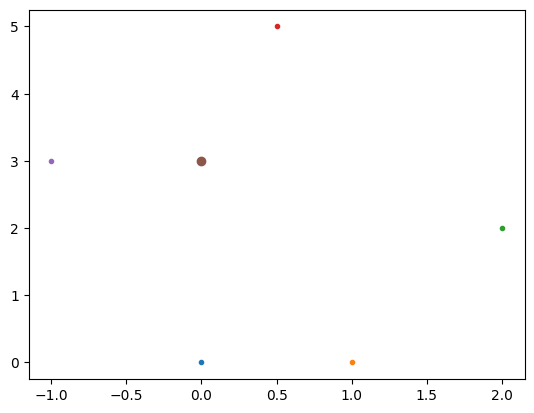

In [79]:
p1 = Point(0,0)
p2 = Point(1,0)
p3 = Point(2,2)
p4 = Point(0.5,5)
p5 = Point(-1,3)

q = Point(0,3)

p5p1 = LineSegment(p5,p1)

poly = Polygon([p1,p2,p3,p4,p5])

answ = PiP(q, poly)
print('Since the answer is ' + str(answ) + ', then q is in the polygon')

plt.plot(p1.x,p1.y, '.', p2.x,p2.y, '.', p3.x,p3.y, '.', p4.x,p4.y, '.', p5.x,p5.y, '.')
plt.plot(q.x, q.y, 'o')
plt.show()

Since the answer is 1, then q is in the polygon


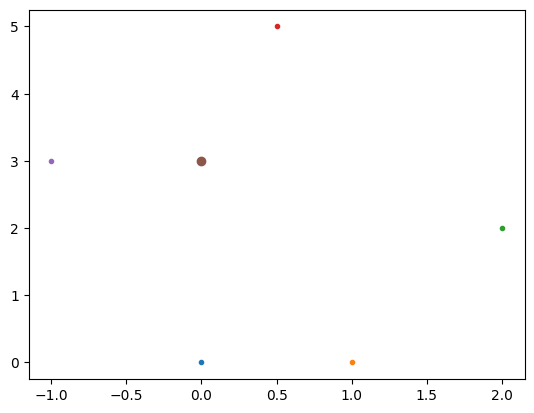

In [80]:
p1 = Point(0,0)
p2 = Point(1,0)
p3 = Point(2,2)
p4 = Point(0.5,5)
p5 = Point(-1,3)

q = Point(0,3)

p5p1 = LineSegment(p5,p1)

poly = Polygon([p5,p4,p3,p2,p1])

answ = PiP(q, poly)
print('Since the answer is ' + str(answ) + ', then q is in the polygon')

plt.plot(p1.x,p1.y, '.', p2.x,p2.y, '.', p3.x,p3.y, '.', p4.x,p4.y, '.', p5.x,p5.y, '.')
plt.plot(q.x, q.y, 'o')
plt.show()


Since the answer is 0, then q is in the polygon


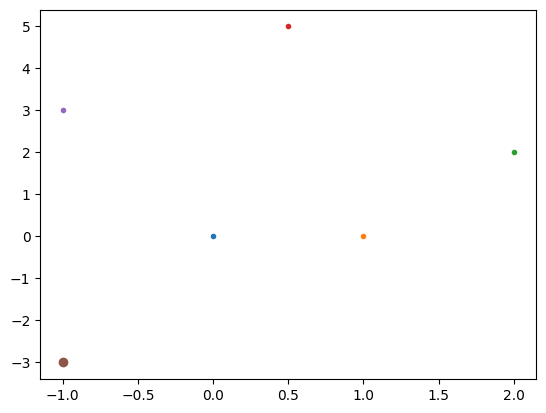

In [81]:
p1 = Point(0,0)
p2 = Point(1,0)
p3 = Point(2,2)
p4 = Point(0.5,5)
p5 = Point(-1,3)

q = Point(-1,-3)

poly = Polygon([p1,p2,p3,p4,p5])

answ = PiP(q, poly)
print('Since the answer is ' + str(answ) + ', then q is not in the polygon')

plt.plot(p1.x,p1.y, '.', p2.x,p2.y, '.', p3.x,p3.y, '.', p4.x,p4.y, '.', p5.x,p5.y, '.')
plt.plot(q.x, q.y, 'o')
plt.show()

## Assignment 2-2
***

In [113]:
def numCount(q,points):
    numcross = 0

    n = len(points)

    # First need to find the MBR
    xrange, tmp = Polygon.minBoundRect(points)

    # Then find q' = (MBR_x[1], q.y), where xrange = [xlo, xhi]
    qprime = Point(xrange[1], q.y)
    qLS = LineSegment(q,qprime)

    testLS = LineSegment(points[n-1],points[0])

    numcross += cross(testLS, qLS)
    for i in range(n-1):
        testLS = LineSegment(points[i],points[i+1])
        numcross += cross(testLS, qLS)

    if (numcross%2 == 1):
        return 1    # Odd number of hits, means q in Poly
    else:
        return 0    # Even number of hits means q not in Poly
    

In [114]:
points = [p5,p4,p3,p2,p1]

numCount(q, points)

NameError: name 'rhs' is not defined

## Assignment 2-3
***